# ELE510 Image Processing with robot vision: LAB, Exercise 3, Histogram and point transformations

**Purpose:** *To learn about the image histogram, histogram equalization and image noise.*

The theory for this exercise can be found in chapter 3 of the text book [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

The histogram for an image of a **black** and **white** football and **grey** background is
$[0,520,920,490,30,40,5910,24040,6050,80,20,80,440,960,420,0]$, where 16 gray levels are used. 

The diameter of the football is $d = 230\text{mm}$. 

Use these information to find the pixel size, $\Delta x = \Delta y$.

**Describe the steps to arrive to the solution.**

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    1. The area of the ball is given by: $A = \pi \cdot (d/2)^2$ == (number_of_pixels $\cdot$ area_single_pixel)
</details>

1. Plot the histogram to get a visual interpretation of the grayscale image

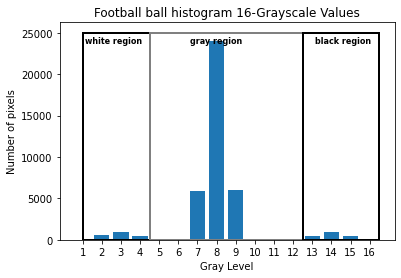

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
ball_histogram = np.array( [0,520,920,490,30,40,5910,24040,6050,80,20,80,440,960,420,0] )
gray_lvls = ball_histogram.shape[0]
pixels = [str(i+1) for i in range(gray_lvls)]

fig, ax = plt.subplots()
ax.bar(pixels, ball_histogram)
white_rect = patches.Rectangle((0, 0), 3.5, 25000, linewidth=2, edgecolor='black', facecolor='none')
gray_rect = patches.Rectangle((3.5, 0), 8, 25000, linewidth=2, edgecolor='gray', facecolor='none')
black_rect = patches.Rectangle((11.5, 0), 4, 25000, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(white_rect)
ax.annotate('white region', (1.6,24000), color='black', weight='bold', fontsize=8, ha='center', va='center')
ax.annotate('gray region', (7,24000), color='black', weight='bold', fontsize=8, ha='center', va='center')
ax.annotate('black region', (13.6,24000), color='black', weight='bold', fontsize=8, ha='center', va='center')
ax.add_patch(gray_rect)
ax.add_patch(black_rect)
plt.title('Football ball histogram 16-Grayscale Values')
plt.xlabel('Gray Level')
plt.ylabel('Number of pixels')
plt.show() 


2. Interpreting the histogram it is possible to observe a big increase of values or number of pixels in the central area.
Since the problem statement clearly establishes that the ball is **black and white** and the background is **gray**, it is plausible to estimate that:
* According to the grayscale [1-16]
    * Values in the top left correspond to white pixels  [1-4]
    * Values in the middle correspond to the gray pixels [5-12] 
    * Values in the top right correspond to black pixels [13-16]
3. Le'ts divide the histogram in three sections according to those rules, then consider the first and third sections as the ones representing the ball.


In [5]:
white_pixels =  ball_histogram[0:4]
gray_pixels =  ball_histogram[4:12]
black_pixels =  ball_histogram[12:15]
total_ball_pixels = white_pixels.sum() + black_pixels.sum()
print(f'Total pixels in ball {total_ball_pixels}')

Total pixels in ball 3750


* Finally given the equation of the area of a ball
$A = \pi \cdot (d/2)^2 == (number \_ of \_ pixels \cdot area \_ single \_ pixel)$
* The area of a single pixel can be calculated as
$area \_ single \_ pixel = \frac{A}{number \_ of \_ pixels}$
*
$size \_ single \_ pixel= \sqrt{area \_ single \_ pixel}$

* Calculating the values according to these equations:

In [6]:
ball_diameter = 230

def get_pixel_area(diameter, total_pixels):
    circle_area = np.pi * (diameter/2)**2
    pixel_area = circle_area / total_pixels
    return pixel_area
pixel_area = np.round( get_pixel_area(ball_diameter, total_ball_pixels), 2)
pixel_size =  np.round( np.sqrt(pixel_area), 2)

print(f'Pixel area {pixel_area}')
print(f'Pixel size {pixel_size}')

Pixel area 11.08
Pixel size 3.33


<div class="alert alert-block alert-info">
    <p>The solution of problem 1 should be:</p>
    
    Δx = Δy = 3.33mm or, if you have taken different level of gray into consideration, Δx = Δy = 3.22mm
</div>


## Problem 2

For images, such as `./images/christmas.png`, 
![./images/christmas.png](./images/christmas.png./images/christmas.png)
some processing is normally desired to improve the contrast. The simplest approach for doing this is called histogram stretching. For a given image, where the used pixel values range from $g_{\text{min}}$ to $g_{\text{max}}$ we can spread these so they cover the entire $[0, G-1]$ range. The formula for histogram stretching is given by:

\begin{equation*}
	g_{\text{new}} = \left\lfloor {\frac{g_{\text{old}}-g_{\text{min}}}{g_{\text{max}}-g_{\text{min}}}G + 0.5} \right\rfloor
\end{equation*}

Where $g_{\text{old}}$ is an old pixel value, and $g_{\text{new}}$ a new pixel value.

**a)** Make a small Python function, taking an image as input, perform histogram stretching using the previous equation, and giving the increased contrast image as output. Use an 8-bit grayscale range (G=256). Show and explain the result using `./images/christmas.png` as an example. 



In [7]:
# Import the packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
"""
Function that takes in input an image and return the same image stretched.
"""
def histogram_stretch(img):
    G = 255
    g_min = img.min()
    g_max = img.max()
    g_diff = (g_max - g_min)
    img_new =  (img - g_min) / (g_diff) * G + 0.5
    img_new = img_new.astype(np.uint8)
    return img_new

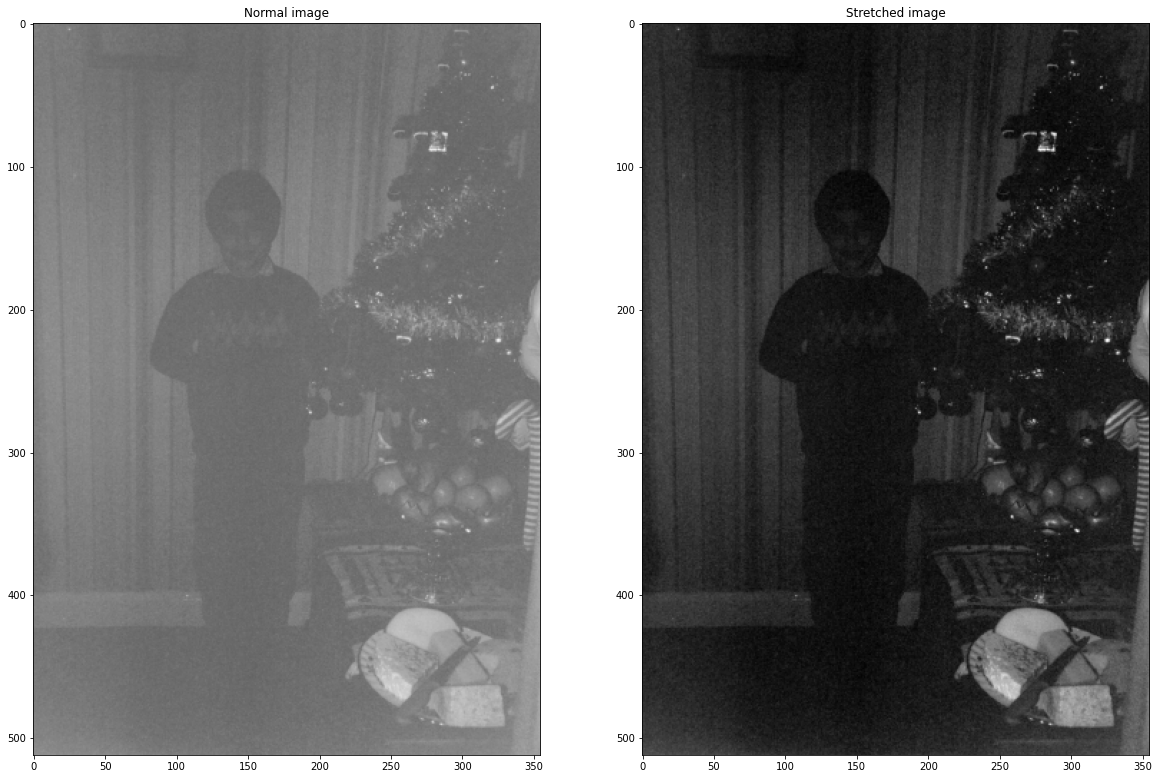

In [18]:
# Read the image and convert it to RGB channels
img = cv2.imread("./images/christmas.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use the function to improve the contrast of the image
img_stretch = histogram_stretch(img)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title('Normal image')
plt.subplot(122)
plt.imshow(img_stretch)
plt.title('Stretched image')
plt.show()



## Problem 3

In this experiment we use **four** images. 
The two first are gray level images, `./images/pout.jpg` and `./images/tire.jpg`. 
The other two are colour images captured with a standard digital camera. 
We want to study image enhancement with histogram equalization. 

*We simplify by using only gray level images*. 
Therefore, the colour images are first read to gray level; a grey level image can be imported using the flag (`cv2.IMREAD_GRAYSCALE`). 
The colour images are `./images/waterfall2.jpg` and `./images/restaurantSpain.jpg`, available from CANVAS.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    <p>1. Make a Python function or script that do histogram equalization <code>cv2.equalizeHist</code>, </p>
    <p>2. computes the histograms <code>plt.hist</code> for both the input image and the output image, </p>
    <p>3. and displays both images with histograms in the same figure (use <code>plt.figure</code> and <code>plt.subplot</code>).</p>
</details>


**a)** Use Python and find the histograms for the images.


In [ ]:
os.path.gf

In [88]:
images[0][0].split('.')

['', '/images/pout', 'jpg']

TypeError: 'builtin_function_or_method' object is not subscriptable

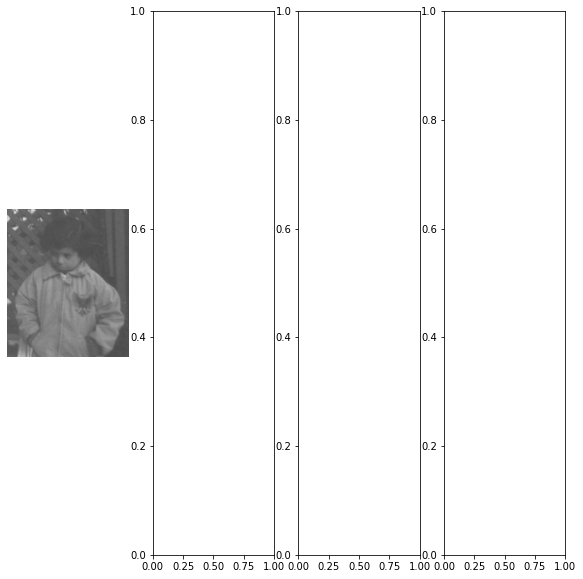

In [85]:
import os
images = [
    ["./images/pout.jpg",False,None,None],
    ["./images/tire.jpg",False,None,None],
    ["./images/restaurantSpain.jpg",True,None,None],
    ["./images/waterfall2.jpg",True,None,None],
]

fig, axs = plt.subplots(1,len(images),figsize=(10,10))

for i in range(len(images)):
    image = images[i]
    axs[i].axis('off')
    if image[1] == True:
        image[2] =  cv2.imread(image[0],cv2.IMREAD_GRAYSCALE)
        axs[i].imshow(image[2],cmap='gray', vmin=0, vmax=255)
    else:
        image[2] =  cv2.imread(image[0])
        axs[i].imshow(image[2])
    file_name = images[i][0].split('.')[0].split['/'][:-1]
    axs[i].set_title(file_name)
#plt.suptitle('Original images in black and white')
#cv.equalizeHist(src)

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


**b)** Perform histogram equalization of these images and find the new histograms.



**c)** Discuss the results. Are the results as expected?



**d)** Explain why the discrete histogram equalization usually do not give a completely flat histogram.


## Problem 4

Noise is a common problem in digital images. 
In this problem we want to study estimation of camera noise. 
We have a set of $K$ images. 
The only difference between the images is the noise value at each pixel. 

Assume that the noise is additive and uncorrelated with the gray values of the image such that for each image point we have
$g_{k} = f + \eta_{k},\, k = 1, 2, \;\cdots\;,K$, where $g_{k}$ is image number $k$ with noise $\eta_{k}$. 

The image without noise, $f$, is unchanged (here we have not shown the indexes $(x,y)$). 
The mean image is given by the average value:

\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y).
\end{equation}

Then it can be shown that
\begin{equation}\label{exc2-eq2}
    E\{\overline{g(x,y)}\} = f(x,y)
\end{equation}

and

\begin{equation}\label{exc2-eq3}
    \sigma^{2}_{\overline{g(x,y)}} =
    \frac{1}{K}\;\sigma^{2}_{\eta(x,y)}.
\end{equation}


**a)** Show how to derive these two results using the first equation and the information given in the text.




### Delivery (dead line) on CANVAS: 26.09.2021 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Tomasetti Luca, room E-401
E-mail: luca.tomasetti@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.